<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285 - Computación Científica I / INF285 - Computación Científica</h1>
    <h1> Tarea 3: Interpolación  </h1>
    <h3> Sebastián Torrico - sebastian.torrico.12@sansano.usm.cl - 201330061-8</h3>
    <h3> [S]cientific [C]omputing [T]eam 2019</h3>
</center>
<p>
<center>Junio 2019 - v2.0 </center>
</p>

---

## Contexto

Hasta hace no más de una década, los dibujos animados y videojuegos eran visualizados con un *framerate* de entre 12 a 24 *frames* por segundo (*FPS*). Sin embargo, las mejoras en las tecnologías nos permiten hoy disfrutar de videos con una mucho mejor fluidez, siendo el *framerate* estándar actual de 60 *FPS*.

### ¿Qué es Interpolación de Movimiento o *Motion-Compensated Frame Interpolation* (MCFI)? 

Corresponde a un método de **procesamiento de video** en el cual se generan *frames* de animación entre los *frames* existentes, utilizando métodos de interpolación. El objetivo principal es mejorar la fluidez del video.

En esta tarea implementaremos MCFI aplicando los algoritmos de interpolación aprendidos en la clase de Computación Científica, para mejorar el *framerate* de un video que posee $N$ FPS (*Frames Per Second*), para luego generar un nuevo video con un total de *frames* mayor al original.

---

#### Librerías

In [1]:
from __future__ import print_function
import numpy as np
#pip3 install imutils
import imutils
#pip3 install opencv-python
import cv2 
import matplotlib.pyplot as plt
import scipy.interpolate as scp
import base64
from IPython.display import HTML

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from time import time

---

## Problema

El problema, descrito de forma general, corresponde al incremento de los FPS de un video, esperando mejorar la fluidez de este. Junto a esta tarea, se adjuntan cuatro videos. El nombre de cada video sigue el formato `video_Nfps.mp4` [1], donde $N$ indica la cantidad de FPS del video. Para esta tarea, trabajaremos con videos con 60, 30, 15 y 5 FPS. Una vez incrementados los FPS, compararemos los resultados con la versión *original* del video.

Para ilustrar de manera inicial lo que se desea realizar, considere un video compuesto por los 2 siguientes *frames*:

<img src="interpolacion2.png" style="float:center;height:200px">

Su algoritmo de interpolación debe ser capaz de construir una o más funciones, utilizando como *data* los frames disponibles del video. En este ejemplo, podríamos construir una interpolación utilizando como datos los dos *frames* disponibles y, mediante esta función, se pueden generar uno o más *frames* dentro de la secuencia para aumentar el *framerate* de su video:

<img src="interpolacion3.png" style="float:center;height:198px">

---

## Sección 1 (40 puntos). Testing de métodos de interpolación

En esta pregunta implementaremos una forma sencilla de interpolación de videos. Considere que el video contiene un total de $M$ frames.

El proceso de interpolación será **a través de cada pixel**, es decir, si se desea interpolar el pixel $(i, j)$ y generar un nuevo frame, entonces el interpolador se debe construir utilizando como *data* todos los pixeles $(i, j)$ del video. De una forma más matemática, el conjunto de datos está definido por:

$$
    S_{i,j} = \{ (x_1, I_1[i, j]), (x_2, I_2[i,j]), \dots, (x_M, I_M[i,j]) \},
$$

donde $x_i$ corresponde a un punto siguiendo una distribución equiespaciada o de Chebyshev e $I_k[i,j]$ denota el valor del pixel $(i,j)$ del $k$-ésimo frame. Su labor en esta pregunta es interpolar los datos de $S_{i,j}$ y así construir los pixeles que se desean agregar entre cada par de frames.

1. Implemente la función _interpolate_\__frames (frames, dst_\__fps, seconds, interpolator)_. Esta función recibe como parámetros:
    * La matriz de _frames_: Video original a interpolar.
    * La cantidad original de *fps*.
    * La cantidad de _fps_ deseados (mayor a los _fps_ originales).
    * La cantidad de segundos que tendrá el video.
    * Un string _interpolator_, cuyos valores posibles son:
        * "spline-cubica": Spline cúbica. Estudie y seleccione un tipo de condición de borde adecuado para el problema, justificando su elección.
        * "spline-lineal": Spline lineal.
        * "lagrange": Interpolación polinomial mediante el método Interpolación de Lagrange.
        * "baricentrica": Interpolación Baricéntrica [2].
    * Un string 'points_type', cuyos valores posibles son:
        * "equi": Para usar una distribución equiespaciada de puntos en el eje de las abscisas.
        * "cheb": Los x_i (o eje de las abscisas) son los puntos de Chebyshev.

    En caso de utilizar código ajeno, ya sean librerías, notebooks del curso u otro, recuerde referenciar apropiadamente.<br/><br/>

2. Mediante la función implementada anteriormente, aumentaremos los *framerates* de los videos disponibles. Para esto:
    * Tomando como base el _video_\__30fps.mp4_, genere un video de 60 fps.
    * Tomando como base el _video_\__15fps.mp4_, genere un video de 30 fps.
    * Tomando como base el _video_\__5fps.mp4_, genere un video de 15 fps.
    * Tomando como base el _video_\__5fps.mp4_, genere un video de 60 fps.

    Para esto, utilize los 4 interpoladores generados y las distribuciones de puntos especificadas. Mida los tiempos de cómputos de cada método, con cada distribución de puntos.

### 1. Funciones

In [2]:
def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    y = np.sin((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2

def matrix_to_video(frames, old_fps, new_fps, width, height, interpolator, points_type):
    name = "video_"+str(old_fps)+"_to_"+str(new_fps)+"fps_"+interpolator+"_"+points_type+".mp4"
    out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc('m','p','4','v'), new_fps, (width,height))
    
    for i in range(frames.shape[2]):
        frame = np.uint8(frames[:,:,i])
        out.write(np.dstack([frame, frame, frame]))
    
    out.release()
    cv2.destroyAllWindows()

In [3]:
'''
frames: array of frames (height x width x total_frames)
old_fps: Number of fps of the original video
new_fps: fps of output matrix 
seconds: seconds of video 
interpolator: Interpolator type
points_type: Points distribution to use

return: dst_frames (array of frames (height x width x dst_fps*seconds))
'''

def interpolate_frames(frames, old_fps, new_fps, seconds, interpolator, points_type):            
    
    if(new_fps > old_fps):
        start_time = time() 
        mult = new_fps/old_fps
        height = frames.shape[0]
        width = frames.shape[1]
        dst_frames = np.zeros((height, width, round(new_fps)*seconds), dtype=np.uint8)
        
        if(points_type == "equi"):
            x = np.arange(0, frames.shape[2], 1)
            xs = np.linspace(0, frames.shape[2]-1, num=round(new_fps)*seconds)
            
        elif(points_type == "cheb"):
            x = Chebyshev_points(old_fps, 1, old_fps*seconds)
            xs = Chebyshev_points(old_fps, 1, new_fps*seconds)
            
        for i in range(height):
            for j in range(width):
                ys = frames[i, j] 

                if(interpolator == "spline-cubica"): 
                    S = scp.CubicSpline(x, ys)

                elif(interpolator == "spline-lineal"):
                    S = scp.UnivariateSpline(x, ys)

                elif(interpolator == "lagrange"):
                    S = scp.lagrange(x, ys)

                elif(interpolator == "baricentrica"):
                    S = scp.BarycentricInterpolator(x, ys)

                else:
                    break  

                dst_frames[i][j] = S(xs)

        fps = int(dst_frames.shape[2]/seconds)
        matrix_to_video(dst_frames, old_fps, fps, width, height, interpolator, points_type)
        end_time = time() 
        exe_time = end_time - start_time
        print("Video " + str(old_fps) + "-" + str(new_fps) + "fps (" + interpolator + "-" + points_type + "): " + str(exe_time) +" segs.")
            
    return dst_frames

Para simplificar el manejo del video en el *notebook*, se les facilita la función `video_to_matrix` que les permitirá abrir un video y transformarlo a una estructura de datos de *numpy*. El resultado será una *array* de dimensión $\text{height}\times\text{width}\times\text{Total de frames}$, donde *height* corresponde a la altura (en pixeles) del video y *width* al ancho del video.

In [4]:
'''
Carga de video a matriz de [height, width, fps*seconds], dejando en escala de grises cada frame, 
reduciendo su dimensionalidad.

Input:
    src_name: nombre (o path) de video de origen
    seconds: cantidad de tiempo en segundos a considerar del video de origen.

Output: 
    frames: matriz de shape [height, width, fps*seconds], la cual contiene los frames del video original
    number_fps: frames por segundo del video original
'''
def video_to_matrix(src_name, seconds):
    # Se lee el video
    stream = cv2.VideoCapture(src_name)
    
    # Dimension del video y fps
    height = round(stream.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = round(stream.get(cv2.CAP_PROP_FRAME_WIDTH))
    number_fps = stream.get(cv2.CAP_PROP_FPS)
    
    frames = np.zeros((height, width, round(number_fps)*seconds), dtype=np.uint8)
    
    for i in range(round(number_fps)*seconds):
        # Leer el video hasta que no hayan más datos
        (grabbed, frame) = stream.read()
        if not grabbed:
            break
            
        # Leer el frame y cambiarlo a escala de grises
        frame = cv2.resize(frame, (width, height)) 
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames[:,:,i] = frame
        
    return frames

Además, el siguiente código sirve para visualizar un video dentro del mismo *notebook*.

In [5]:
HTML('\
<div align="middle">\
<video width="80%" controls>\
      <source src="./{0}" type="video/mp4">\
</video></div>'.format('video_60fps.mp4'))

### 2. Generación de los nuevos vídeos 
El siguiente bloque genera automáticamente los vídeos que ya van adjuntos. 

<strong> Nota: No es necesario ejecutar este bloque. Se dejó para mostrar como se generaron los nuevos vídeos. Su ejecución podría sustituir los vídeos generados y utilizados para el posterior análisis.</strong>

In [6]:
tipos = ["spline-cubica", "spline-lineal", "baricentrica"]    
#tipos = ["lagrange"]

for tipo in tipos:
    
    #5 a 15 fps
    frames = video_to_matrix('video_5fps.mp4', 5)
    interpolate_frames(frames, 5, 15, 5, tipo, "equi")
    interpolate_frames(frames, 5, 15, 5, tipo, "cheb")
    
    #5 a 60 fps
    frames = video_to_matrix('video_5fps.mp4', 5)
    interpolate_frames(frames, 5, 60, 5, tipo, "equi")
    interpolate_frames(frames, 5, 60, 5, tipo, "cheb")
    
    #15 a 30 fps
    frames = video_to_matrix('video_15fps.mp4', 5)
    interpolate_frames(frames, 15, 30, 5, tipo, "equi")
    interpolate_frames(frames, 15, 30, 5, tipo, "cheb")
    
    #30 a 60 fps
    frames = video_to_matrix('video_30fps.mp4', 5)
    interpolate_frames(frames, 30, 60, 5, tipo, "equi")
    interpolate_frames(frames, 30, 60, 5, tipo, "cheb")

Video 5-15fps (spline-cubica-equi): 33.80784583091736 segs.
Video 5-15fps (spline-cubica-cheb): 29.546075105667114 segs.
Video 5-60fps (spline-cubica-equi): 35.64076113700867 segs.
Video 5-60fps (spline-cubica-cheb): 32.583930253982544 segs.
Video 15-30fps (spline-cubica-equi): 35.02244544029236 segs.
Video 15-30fps (spline-cubica-cheb): 31.464919567108154 segs.
Video 30-60fps (spline-cubica-equi): 38.012431383132935 segs.
Video 30-60fps (spline-cubica-cheb): 34.08292484283447 segs.


C:\Users\Seba\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Video 5-15fps (spline-lineal-equi): 33.094592332839966 segs.
Video 5-15fps (spline-lineal-cheb): 31.734200477600098 segs.
Video 5-60fps (spline-lineal-equi): 36.26110315322876 segs.
Video 5-60fps (spline-lineal-cheb): 34.54272508621216 segs.


C:\Users\Seba\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:226: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Video 15-30fps (spline-lineal-equi): 85.2930793762207 segs.
Video 15-30fps (spline-lineal-cheb): 77.72530317306519 segs.
Video 30-60fps (spline-lineal-equi): 164.7747142314911 segs.
Video 30-60fps (spline-lineal-cheb): 152.61520838737488 segs.
Video 5-15fps (baricentrica-equi): 54.52327251434326 segs.
Video 5-15fps (baricentrica-cheb): 50.56485152244568 segs.
Video 5-60fps (baricentrica-equi): 64.82081866264343 segs.
Video 5-60fps (baricentrica-cheb): 61.19749975204468 segs.


C:\Users\Seba\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:513: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
C:\Users\Seba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Seba\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:609: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Video 15-30fps (baricentrica-equi): 150.17451000213623 segs.
Video 15-30fps (baricentrica-cheb): 134.5959746837616 segs.
Video 30-60fps (baricentrica-equi): 442.159462928772 segs.
Video 30-60fps (baricentrica-cheb): 478.95899653434753 segs.


#### Tiempos obtenidos para cada video
   
   En la siguiente tabla se muestran los tiempos que tardó cada interpolador para convertir cada video, dependiendo si se escogieron puntos equispaciados o por Chebyshev.

| Interpolador | 5-15 fps (equi) | 5-15 fps (cheb) | 5-60 fps (equi) | 5-60 fps (cheb) | 15-30 fps (equi) | 15-30 fps (cheb) | 30-60 fps (equi) | 30-60 fps (cheb) |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Spline-Cúbica | 32.9 s| 29.7 s | 35.6 s | 32.2 s | 34.2 s | 30.1 s | 37.8 s | 35.0 s |
| Spline-Lineal  | 33.8 s| 31.7 s | 37.2 s | 34.8 s | 86.4 s | 78.6 s | 166.3 s | 155.4 s |
| Baricéntrica  | 53.5 s| 50.5 s | 64.6 s | 61.6 s | 153.4 s | 136.8 s | 348.1 s | 320.4 s |
| Lagrange  | 500+ s| 500+ s | 500+ s | 500+ s | 500+ s | 500+ s | 500+ s | 500+ s |

   Cabe destacar que no se obtuvieron resultados utilizando Lagrange. Al experimentar solo se pudo generar 2 videos de 5 a 15 fps con ambos tipos de puntos y cada uno demoró 1 hora aproximadamente, por lo que, se ignoraron para el análisis.
   
      Para la pregunta 3: A modo general es posible notar cual es el orden de los interpoladores más eficientes. El mejor de todos es la Spline Cúbica, seguido por la Spline Lineal, Baricéntrica y finalizando con Lagrange. Además, es posible notar que para todos los casos, una distribución de puntos de Chebyshev hace que la interpolación sea más rápida que al ser equispaciado. La razón de esto se debe a que Chebyshev se utiliza para minimizar el problema del fenómeno de Runge, pues garantiza que el error máximo disminuye cuando crece el grado del polinomio [1], a diferencia de utilizar nodos equidistantes. 
   

## Sección 2 (15 puntos). Visualización del interpolador y del error, a través del tiempo

1. Utilizando el *widget* adjunto, visualice los resultados generados por los interpoladores, su error y comente al respecto. ¿Qué método le parece que tiene un mejor desempeño?

**Nota**: usted debe modificar el *widget* en las secciones necesarias para que lea correctamente los videos generados por usted, acorde a los parámetros que se pueden variar. Puede modificar secciones del *widget* para que se adapte a sus códigos.

interactive(children=(Dropdown(description='method', options=('spline-cubica', 'spline-lineal', 'lagrange', 'b…

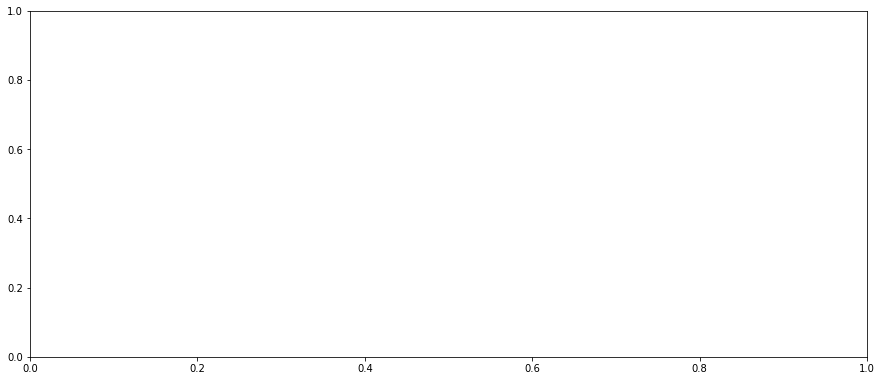

In [6]:
# Widget to plot the interpolation function
def plot_interpolation(method, points_dist, i, j, fps_increase_type):
    
    # Elegimos el video a trabajar
    if fps_increase_type == "5->15":
        frames = video_to_matrix('video_15fps.mp4', 5)
        interpolated_video_name = 'video_5_to_15fps_' + method + "_" + points_dist + ".mp4" 
        
    elif fps_increase_type == "5->60":
        frames = video_to_matrix('video_60fps.mp4', 5)
        interpolated_video_name = 'video_5_to_60fps_' + method + "_" + points_dist + ".mp4"
        
    elif fps_increase_type == "15->30":
        frames = video_to_matrix('video_30fps.mp4', 5)
        interpolated_video_name = 'video_15_to_30fps_' + method + "_" + points_dist + ".mp4"
        
    else:
        frames = video_to_matrix('video_60fps.mp4', 5)
        interpolated_video_name = 'video_30_to_60fps_' + method + "_" + points_dist + ".mp4"
        
    # Un punto por frame
    x = np.arange(0, frames.shape[2], 1)
    
    # Obtención de la matriz de los videos con mayor framerate
    interp_frames = video_to_matrix(interpolated_video_name, 5)
    plt.figure(figsize=(15, 14))
    
    # Grafico del interpolador y los pixeles reales
    plt.subplot(211)
    plt.plot(x, interp_frames[i,j,:], 'rx-', label='Video interpolados')
    plt.plot(x, frames[i,j,:], 'bd', label='Video esperado')
    plt.ylim([0, 256])
    plt.title('Comparación entre los pixeles interpolados y los deseados')
    plt.xlabel('Frame')
    plt.ylabel('Valor pixel')
    plt.grid(True)
    
    # Grafico del error
    plt.subplot(212)
    error_matrix = frames - interp_frames
    plt.plot(x, error_matrix[i,j,:], 'sk-', label='Error de interpolación')
    mean_error = np.zeros(error_matrix.shape[2])
    sigma = mean_error.copy()
    for k in range(error_matrix.shape[2]):
        mean_error[k] = error_matrix[:,:,k].mean()
        sigma[k] = error_matrix[:,:,k].std()
    plt.plot(x, mean_error, '.-', label='Error medio de interpolación')
    plt.plot(x, mean_error + sigma, label='Error medio + desviación estándar')
    plt.plot(x, mean_error - sigma, label='Error medio - desviación estándar')
    plt.title('Error de interpolación')
    plt.xlabel('Frame')
    plt.ylabel('Error')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

interact(
    plot_interpolation, 
    method=["spline-cubica","spline-lineal","lagrange","baricentrica"],
    points_dist=["equi","cheb"],
    j=(0, 511),
    i=(0, 269),
    fps_increase_type=["5->60", "5->15", "15->30", "30->60"]
);

Luego de interactuar con los resultados obtenidos por los interpoladores se pueden destacar los siguientes puntos:

- Hay mejores resultados, según los errores de interpolación, cuando se utilizan videos con mayores fps. Esto se debe a que existe una mayor cantidad de frames para construir los polinómios, por lo que el interpolador tiene más valores para determinar. A medida que el vídeo inicial tiene menos fps, aparecen más errores. También aparecen más errores cuando se desea aumentar bruscamente los fps, como en el caso de pasar de 5 a 15 fps o de 5 a 60 fps.
    
- Para un mismo video generado se puede notar que ciertos pixeles tienden a mostrar más errores de interpolación que otros. Una razón de esto se debe a la ubicación del pixel; si este se encuentra en una zona en donde no hay mucho movimiento (como el fondo), la interpolación presenta menos errores, pero, en el caso que se encuentre, por ejemplo, en el centro, entonces la interpolación tiende a tener más errores, lo que se puede observar desviación estándar del error. 

- Observando las interpolaciones y errores es posible notar que el método de Spline Cúbica es quien realiza una interpolación más precisa, según los pixeles que corresponden. Al cambiar a Spline Lineal se aprecia una buena interpolación igualmente, pero su precisión tiende a variar levemente y en ciertos casos aumenta levemente la cantidad de errores. Por último, la Baricéntrica es la que menos precisión tiene y mayor cantidad de errores presenta. Cabe destacar que depende del caso, es decir, cuando se analiza una conversión de 30-60 fps, todos los métodos presentan buenas interpolaciones; sin embargo, cuando la conversión es más brusca (5-15 fps o 5-60 fps) es más fácil encontrar las diferencias, donde la baricéntrica en algunos casos realiza interpolaciones totalmente incorrectas, lo que se puede apreciar en el vídeo generado.

- En adición al punto anterior, los resultados se afinan dependiendo la distribución de puntos. En general, utilizando la distribución de Chebyshev se logran mejores interpolaciones, lo que se argumenta con la disminución de errores encontrados por frame para cada método y en los tiempos de ejecución respecto a una distribución equidistante. 

Por tanto, los métodos tienen mejor desempeño cuando se utiliza una distribución de Chebyshev para los puntos. Por otra parte, la Spline-Cúbica es la más eficiente, seguida por la Spline-Lineal que logra resultados muy similares, pero para mayores fps tiende a demorarse considerablemente más que el primer método. Por último, el peor desempeño lo tiene el método Baricéntrico debido a que para transformaciones más brucas presenta una alta cantidad de errores, sobretodo si se utilizan puntos equidistante, donde se generan vídeos donde la imágen se queda congelada. Esta conclusión es sin considerar el método de Lagrange, ya que, debido a sus tiempos de ejecución no se lograron obtener vídeos; no sería justo considerarlo el peor método, pues no se sabe la calidad de las interpolaciones que realiza

## Sección 3 (25 puntos). Comparación de Videos

1. Utilizando los videos generados en la pregunta anterior, compare visualmente los videos generados con su versión de "origen" (video original al que se le agregaron nuevos *frames*) y con la versión "esperada" del video; por ejemplo, para la interpolación de 15fps a 30fps, el video de origen sería _video_\__15fps.mp4_, y el video esperado _video_\__30fps.mp4_. Comente al respecto. ¿Se realiza correctamente la interpolación? ¿Qué es lo que está haciendo visualmente la interpolación en los videos?

    Para ayudar a la visualización de los videos, puede hacer uso de la función _concat_\__2_\__videos (src_\__name, dst_\__name, seconds)_, la cual permite concatenar o "unir" dos videos con el mismo framerate para realizar una comparativa en un nuevo video generado.

    _NOTA: Debe hacer un preprocesamiento sobre el video de origen para compararlo con la interpolación, pues la función solo permite unir 2 videos de igual framerate. Una solución simple es repetir cada frame la cantidad necesaria para completar el framerate deseado_ <br/><br/>

2. Comente respecto a los tiempos de cómputo obtenidos. ¿Existe alguna correlación entre la calidad del video generado y los tiempos de cómputo?

3. Comente respecto al efecto de la distribución de puntos. ¿Genera alguna diferencia la distribución de puntos equiespaciada respecto a los puntos de Chebyshev?

In [ ]:
'''
src_name: name/path of first video
dst_name: name/path of second video
seconds : seconds of video to consider.

returns: None
'''

def concat_2_videos(src_name, dst_name, seconds):
    stream = cv2.VideoCapture(src_name)
    src_frames = video_to_matrix(src_name, seconds)
    print("FPS VIDEO "+src_name+": ",int(src_frames.shape[2]/seconds))
    
    stream_2 = cv2.VideoCapture(dst_name)  
    dst_frames = video_to_matrix(dst_name, seconds)
    print("FPS VIDEO "+dst_name+": ",int(dst_frames.shape[2]/seconds))

    # Close original videos
    stream.release()
    stream_2.release()
    
    if dst_frames.shape[2] != src_frames.shape[2]:
        print("No es posible concatenar dos videos de distinto fps")
        return
    
    fps = int(dst_frames.shape[2]/seconds)
    
    #concatenate both videos
    conc_frames = np.concatenate((src_frames, dst_frames), axis=1)
    
    height = conc_frames.shape[0]
    width = conc_frames.shape[1]
    
    #saving comparison on a new video
    out = cv2.VideoWriter("comparison_"+src_name+"_vs_"+dst_name,cv2.VideoWriter_fourcc('m','p','4','v'), fps, (width,height))
   
    for i in range(conc_frames.shape[2]):
        frame = np.uint8(conc_frames[:,:,i])
        out.write(np.dstack([frame, frame, frame]))
    
    out.release()
    cv2.destroyAllWindows() 

## Sección 4 (10 puntos): Conclusión

Considerando todo el trabajo anterior, concluya al respecto.

1. _¿En palabras simples, qué es lo que realiza el interpolador entre cada par de *frames*?. **Hint: Un análisis frame a frame puede ayudar a responder esto.**_

2. _¿De qué manera se pueden mejorar los métodos estudiados para aumentar el framerate de un video?. **Hint: ¿Es adecuado considerar el conjunto de pixeles como independientes entre sí?**_

# Referencias
[1] Stock footage provided by Videvo, downloaded from https://www.videvo.net

[2] Barycentric Lagrange Interpolation, https://people.maths.ox.ac.uk/trefethen/barycentric.pdf